# Merge Historical Data and Historical Weather

In [1]:
import pandas as pd
import holidays
from datetime import date

In [3]:
weather_df = pd.read_csv('../00_Data/external/historical_weather_bulk.csv')

In [4]:
d_types = {
    'lat': 'float64',
    'lon': 'float64',
    'temp': 'float64',
    'pressure': 'float64',
    'humidity': 'float64',
    'wind_speed': 'float64',
    'clouds_all': 'float64',
}

In [5]:
weather_df.index = pd.to_datetime(weather_df['dt_iso'], format="%Y-%m-%d %H:%M:%S %z UTC")

In [6]:
weather_df = weather_df[d_types.keys()].astype(d_types)

In [7]:
locations = {
    'london': {
        'lat': 51.503655,
        'lon': -0.105732
    },
    'liverpool': {
        'lat': 53.402859,
        'lon': -2.969904
    },
    'bath': {
        'lat': 51.387535,
        'lon': -2.373896
    }
}

In [8]:
for key, loc in locations.items():
    weather_df[key] = (weather_df['lat'] == loc['lat']) & (weather_df['lon'] == loc['lon'])
    
weather_df['location'] = weather_df[locations.keys()].idxmax(axis=1)
weather_df = weather_df.drop(['lat', 'lon'] + list(locations.keys()), axis=1)

In [9]:
dfs_wo_duplicates = []
for loc in locations.keys():
    df = weather_df.loc[weather_df['location'] == loc]
    dfs_wo_duplicates.append(df.loc[~df.index.duplicated(keep='first')])
    
df_wo_duplicates = pd.concat(dfs_wo_duplicates)

In [10]:
df_pivot = df_wo_duplicates.pivot(columns='location', values=['temp', 'pressure', 'humidity', 'wind_speed', 'clouds_all'])

In [11]:
df_pivot.columns = df_pivot.columns.map('_'.join)

In [12]:
df_pivot

,temp_bath,temp_liverpool,temp_london,pressure_bath,pressure_liverpool,pressure_london,humidity_bath,humidity_liverpool,humidity_london,wind_speed_bath,wind_speed_liverpool,wind_speed_london,clouds_all_bath,clouds_all_liverpool,clouds_all_london
dt_iso,,,,,,,,,,,,,,,
2008-01-01 00:00:00+00:00,281.24,281.94,280.27,1026.0,1023.0,1027.0,97.0,94.0,87.0,2.27,5.10,2.10,88.0,40.0,75.0
2008-01-01 01:00:00+00:00,280.76,282.04,280.58,1026.0,1023.0,1026.0,97.0,94.0,91.0,2.11,5.10,1.00,98.0,100.0,100.0
2008-01-01 02:00:00+00:00,279.81,282.01,280.52,1025.0,1022.0,1026.0,96.0,92.0,91.0,2.01,5.70,2.10,99.0,100.0,75.0
2008-01-01 03:00:00+00:00,279.81,281.95,280.57,1025.0,1022.0,1025.0,97.0,92.0,91.0,2.04,5.10,1.50,98.0,40.0,75.0
2008-01-01 04:00:00+00:00,279.61,281.91,280.39,1024.0,1021.0,1025.0,97.0,92.0,91.0,1.96,4.10,1.50,99.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-06 19:00:00+00:00,277.76,275.97,276.32,1015.0,1011.0,1016.0,93.0,90.0,88.0,4.66,5.66,2.06,100.0,75.0,40.0
2023-12-06 20:00:00+00:00,278.15,276.39,276.45,1013.0,1011.0,1016.0,93.0,90.0,90.0,6.23,5.66,3.09,100.0,75.0,20.0
2023-12-06 21:00:00+00:00,278.66,276.53,276.87,1013.0,1011.0,1015.0,93.0,90.0,87.0,6.23,5.14,3.60,100.0,75.0,40.0


In [16]:
historical_demand_series = pd.read_pickle('../00_Data/historic_demand.pkl')

In [17]:
df_reindexed = df_pivot.reindex(historical_demand_series.index)

<Axes: >

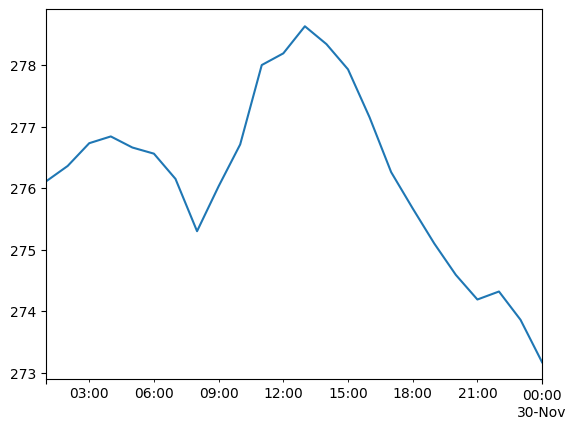

In [18]:
df_reindexed['temp_london'].loc[df_reindexed.index > '2023-11-29'].dropna().plot()

In [19]:
df_interpolated = df_reindexed.interpolate(method='time')

In [20]:
df_final = pd.concat([s, df_interpolated], axis=1)

In [ ]:
df_final.to_pickle('../00_Data/data_full.pkl')

## Add UK Holidays to DF

In [22]:
is_holiday = list(map( lambda x: x in holidays.GB(), df_final.index.date))

In [313]:
df_final['is_holiday'] = is_holiday

In [314]:
df_final.to_pickle('../00_Data/data_full_with_holiday.pkl')